<a href="https://colab.research.google.com/github/vanislekahuna/vanislekahuna.github.io/blob/test/Vancouver_Island_Coastal_Wolves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Intro to PyMC and the Language for Describing Statistical Models**

<img src="https://www.treehugger.com/thmb/wtdAziNcI48x_LfeJTOfpkBW_qQ=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/__opt__aboutcom__coeus__resources__content_migration__mnn__images__2015__09__coastal-wolves-in-water-f666d5377b7c4640a61ebe732c239dc0.jpg" width=650 height=400>

[Source](https://www.treehugger.com/tracking-british-columbias-secretive-sea-wolf-4863272)

In our previous article on [why most examples of Bayesian inference misrepresent what it is](https://pub.towardsai.net/why-most-introductory-examples-of-bayesian-statistics-misrepresent-it-d2e12ac69278?gi=f468b252c728), we clarified a common misunderstanding amongst beginners of Bayesian Statistics. That is, that the field of Bayesian Statistics IS NOT defined by its use of Bayes' Theorem, but rather by its use of probability distributions to characterize uncertainty and consider the full range of possible outcomes. So, for example, rather than being told that a given medical device is 95% effective in detecting a disease given the fact that you know with absolute certainty you are already infected (what we can otherwise call our **True Positive Rate (TPR)**), we can consider scenarios where that device is only 24%, 69%, or 91% effective in detecting the disease and how those numbers change your probability of contracting it given that you have tested positive from the device. By refusing to accept point estimates (such as the static TPR) in our models and instead favouring a probabilistic approach by considering a full range of outcomes, we stay much more faithful to the Bayesian view of probability.

With that said, the next phase in our learning journey towards attaining a Bayesian state of mind towards thinking about probability theory is by building Bayesian statistical models that integrate its probabilistic approach to characterizing uncertainty. One of the best tools for accomplishing this is the [PyMC](https://github.com/pymc-devs/pymc) python package, which was constructed specifically for conducting Bayesian inference and building probabilistic machine learning models.

However, before we begin building Bayesian models, we need to take a quick detour and introduce the language (i.e. the mathematical notations) used by practitioners to formulate these models. Understanding the language of building models is practical for two reasons:

> *Reason 1*. The first reason is because learning how practitioners, such as scientists and researchers, formulate models using **applied statistics model notation** relates directly with how we write executable code on PyMC. Using model notations allows the statistical modeller to communicate their underlying assumptions about a model using a few short lines of notation. We argue that notations are a much simpler communication form than the alternative which places the onus on the audience to remember convoluted words like homoscedasticity to understand the characteristics of the model they’re working with.

> *Reason 2*. The other reason is that this language spans across all domains, from art history, astronomy, or conservation biology (McElreath, 2020). And so by being comfortable with the language of describing models, we’ll inherently expand the boundaries in which we can understand and communicate knowledge amongst the scientific community (McElreath, 2020).

As a general introduction to **applied statistics model notation**, Prof. McElreath (2020) describes a few principles as the foundation for describing and understanding models in scientific colloquial:

1. Practitioners recognize a set of variables to work with which are sometimes observable. These are called **data**. Unobservable phenomena that result from the data, such as averages, are defined as **parameters**.

2. Practitioners define each variable either in terms of other variables OR in terms of a **probability distribution**.

3. The combination of variables and their probability distributions define a **joint generative model**, which we can use to simulate a hypothetical observation and analyze real ones.

Now that we have the rationale behind the world of model notations, let us illustrate how we use them with a toy example. Let's say you are a conservationist interested in quantifying the probability of running into a male Vancouver Island coastal wolf (Canis lupus crassodon) over a female one in the wild.

As a side note, one of the reasons why we're interested in using the Vancouver Island coastal wolf in our example is because they were recently discovered and classified as a separate subspecies. Therefore, the amount of data and information on them is limited compared to other wolf subspecies, so it would be interesting to generate estimates on this subpopulation's characteristics here and in future articles. Not only is the data limited, but in our opinion, they are just very cool animals that are unique from other wolf subspecies in being able to swim long distances and incorporate seafood in their natural diet (Muñoz‐Fuentes et al., 2009). From a broader perspective, research on animal ecology and population statistics can have implications on an animal's conservation status, population management, and our understanding of their role within an area's broader ecosystem.

Going back to our example, based on this simple research question alone, we can now generate assumptions and build a model that quantifies the gender ratio between Vancouver Island coastal wolves. For starters, we can assume that the distribution of outcomes in this thought experiment are **binomial**, meaning there can only be two outcomes that can occur as a result of our research question. Either we run into a male coastal wolf along our travels across Vancouver Island or a female. In fact, we can actually simulate what we expect a Binomial distribution to look like when there is a 50% chance of either binomial outcome from occurring using the following code:


In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as stats
import seaborn as sns

az.style.use("arviz-darkgrid")

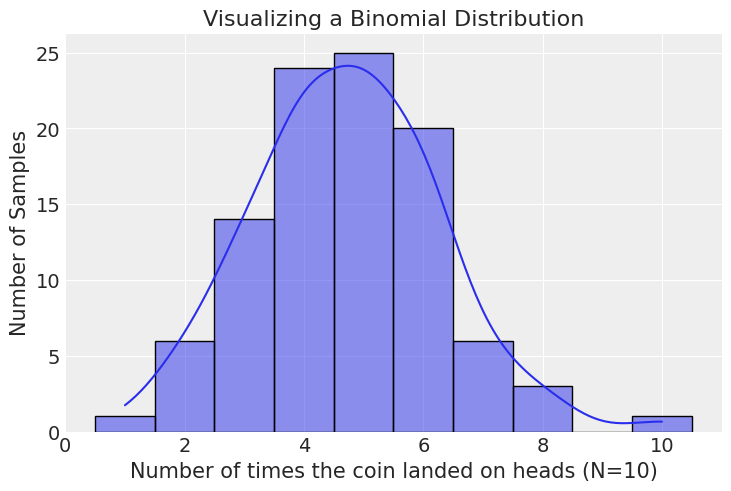

In [ ]:
x_binom = np.random.binomial(n=10, p=0.5, size=100)
sns.histplot(x_binom, kde=True, discrete=True)
plt.xlabel('Number of times the coin landed on heads (N=10)')
plt.ylabel('Number of Samples')
plt.title('Visualizing a Binomial Distribution')
plt.show()

From the graph we’ll find a close approximation to a normal distribution from the outcome of what’s equivalent to 10 coin flips, with the x-axis describing the number of times the coin landed on heads. And if we rerun this experiment 100 times as we’ve done in the code, the y-axis details how often we get the result on the x-axis. In other words, out of the 100 times we reran this experiment, approximately 30 of those experiments resulted in the coin landing on heads about 5 out of 10 flips. Note that the results of the graph will vary slightly every time you execute the code above.

Let’s also bake in another assumption in our model where we’ll assume that either outcome has an equal opportunity of occurring. Amongst binomial distributions, this may not always be the case so it’s not an assumption we should always take as a default. Distributions where there’s an equal chance of any and all outcomes occurring are called a **uniform distribution**. It’s often used in model notations as a way of communicating zero prior knowledge over the possible outcomes in our model. However, with enough practice and experience over time, we’ll discover that it’s often rare for a Bayesian practitioner building the model to have zero prior knowledge of the phenomena they intend to model. We can simulate this distribution as well if you’re curious as to what it looks like in a graph:

Text(0.5, 1.0, 'Visualizing a uniform distribution')

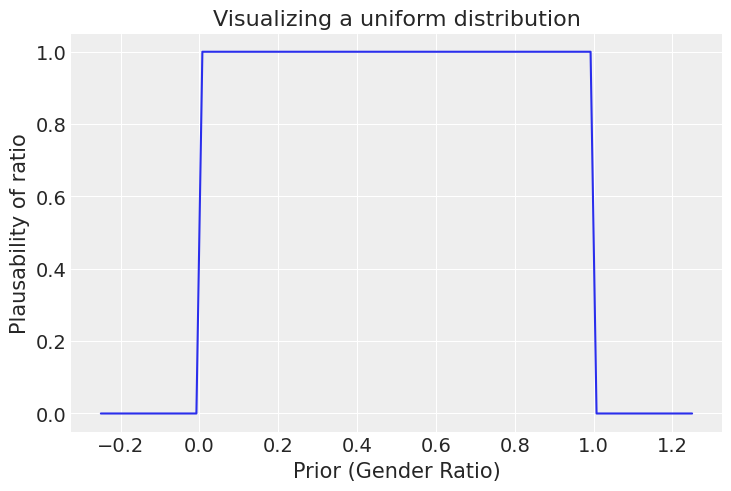

In [ ]:
x_uni = np.linspace(-.25, 1.25, 100)
plt.plot(x_uni, stats.uniform.pdf(x_uni, 0, 1))
plt.xlabel("Prior (Gender Ratio)")
plt.ylabel("Plausability of ratio")
plt.title("Visualizing a uniform distribution")

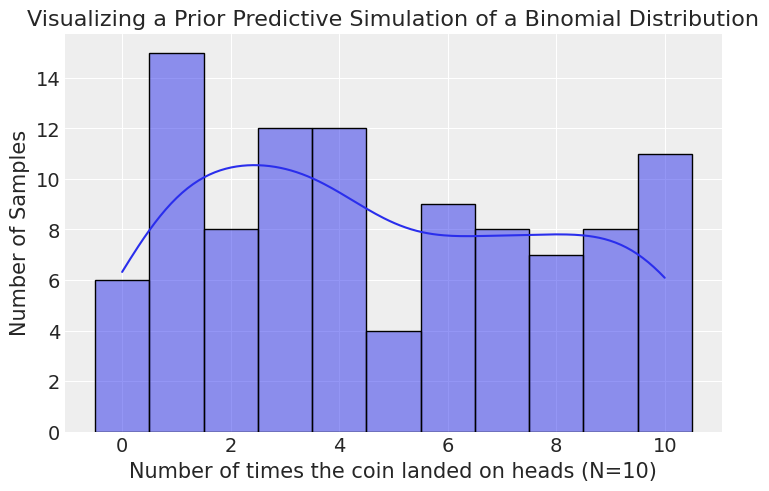

In [ ]:
uniform_dist = np.linspace(0, 1, 100)
prior_predictive_simulation = np.random.binomial(n=10, p=uniform_dist, size=100)
sns.histplot(prior_predictive_simulation, kde=True, discrete=True)
plt.xlabel('Number of times the coin landed on heads (N=10)')
plt.ylabel('Number of Samples')
plt.title('Visualizing a Prior Predictive Simulation of a Binomial Distribution')
plt.show()

Once we've identified our assumptions of our gender ratio model on coastal wolves, let's formalize it in applied statistical model notation:

$ M \sim \text{Binomial}(N, p) $

$ p \sim \text{Uniform}(0, 1) $

- $ M \sim \text{Binomial}(N, p) $: We can interpret our first line as "the number of males ($M$) we'll encounter is distributed binomially with a sample size of $N$ and a prior probability of $p$." This line will represent our **likelihood function**, also known as the **probability of the evidence P(E | H)** in Bayes' Theorem, which is the likelihood of observing a given outcome. In this case, the "given outcome" will be the result of our sample data on coastal wolves, which we'll go into more detail shortly.
- $ p \sim \text{Uniform}(0, 1) $: Lastly, we can interpret our second line as "the **prior probability P(H)** is distributed uniformly between 0 and 1."

Note that the $\sim$ symbol means "is distributed as" and communicates that the parameter on the left-hand side of the model has a **stochastic relationship** (meaning "randomly determined" or has a property of a "randomly probability distribution" which can be predicted statistically BUT NOT precisely) with its distribution. In other words, whenever we see the $\sim$ symbol representing a stochastic relationship, we should expect the output of the mathematical statement on the right to be a distribution captured by the variable on the left (in our case, either $p$ or $M$). Expressing stochastic relationships runs in stark contrast to mathematical statements we're used to seeing with a single number (rather than a distribution) being the output of an equation consisting of an $=$ symbol, such as a common one we often see for Linear Regressions which is $y = mx + b$.

The last thing we need before we can translate our model into code is to generate a sample of observations for our **likelihood function** ($P(E | H)$), which, again, represents the likelihood of us observing the given outcome of events. For example, if we used the sample data acquired by Muñoz-Fuentes and her colleagues (2009) in their study on Vancouver Island coastal wolves, we'll find that of the 28 wolves with a labelled gender, 15 were male. In this case, we can describe our likelihood function as the probability of encountering 15 males from the total 28 wolves we encountered in our sample dataset.

With our variables established, we can now use PyMC to bake in the model notations we just formalized directly into code:



In [ ]:
# Reading our sample dataset from the Muñoz-Fuentes et al. (2009) study.
wolf_samples = "https://raw.githubusercontent.com/vanislekahuna/Statistical-Rethinking-PyMC/main/Data/Vancouver-Island-wolf-samples.csv"
islandwolves_df = pd.read_csv(wolf_samples)
islandwolves_df

,Specimen codea,Sexb,Agec,Collection dated,Tissue,Haplotype,Microsatellites attempted?
0,RBCM 001441,?,Ad,19100000,Tooth root,lu68,No
1,Cowan 6146,M,?,19320326,Tooth root,lu68h,No
2,RBCM 001862,F,Ad,19370329,Tooth root,lu68e,No
3,RBCM 001864,M,Ad,19370416,Tooth root,lu68,No
4,RBCM 001863,F,Ad,19370417,Tooth root,lu68,No
5,RBCM 003339,M,Ad,19380800,Tooth root,lu68,No
6,RBCM 005304,F,Ad,19470924,Tooth root,lu68,No
7,RBCM 005305,?,Imm,19470924,Tooth root,lu68,No
8,RBCM 005306,?,Imm,19470924,Tooth root,lu68f,No
9,RBCM 005307,?,Imm,19470924,Tooth root,lu68/38f,No


In [ ]:
# Determining the male-to-female ratio in the dataset
print(f"The value count for Vancouver Island coastal wolves' sex is: ")
islandwolves_df["Sexb"].value_counts()

The value count for Vancouver Island coastal wolves' sex is: 


M    15
F    13
?     5
Name: Sexb, dtype: int64

In [ ]:
# Generating the sample observations for our model
males = islandwolves_df["Sexb"].value_counts()["M"]
females = islandwolves_df["Sexb"].value_counts()["F"]
total_samples = males + females

In [ ]:
# With help from: https://twiecki.io/pymc-in-browser.html

with pm.Model() as wolf_ratio:
  # A uniform distribution of possible outcomes for prior values
  priors = pm.Uniform("uniform_prior", lower=0, upper=1)

  # Generates a binomial distribution from our uniform distribution of priors
  # and our sample data where 15 of the 28 wolves turned out to be males.
  n_males = pm.Binomial("sex_ratio", p=priors, observed=males, n=total_samples)

  # Samples drawn from the model to generate our posterior distribution.
  trace_wolves = pm.sample(1000, tune=1000)

Now that our model's been actualized, let's not get caught up in the weeds and forget the sole purpose of building the model in the first place. The reason why we're building the model is to quantify the probability of running into a male wolf through the distribution of possibilities and essentially ranking them by their likelihood. To put it another way, we're interested in the probability of observing 15 males from the 28 total wolves we've encountered (our likelihood function) given every plausible male-to-female ratio, as represented by our prior distribution (i.e., 1% of all wolves in the wild being male, 2%, 3%, all the way to 100%). The end result here should be a **posterior probability distribution** showing you which male-to-female ratios are most plausible based on the sample data we observed. From the code above, the posterior distribution is captured in the `trace_wolves` object, which generates the resulting posterior probabilities by sampling the model we built. In case you're wondering, the sampling methods used to generate the posterior distribution is a topic we can cover in a later article, as there are several choices PyMC provides, each being its own deep and expansive rabbit hole.

The graph on the left below visualizes what our resulting posterior distribution looks like, with the x-axis representing our prior probability distribution of gender ratios while the y-axis represents the plausibility of that ratio:

array([[<Axes: title={'center': 'uniform_prior'}>,
        <Axes: title={'center': 'uniform_prior'}>]], dtype=object)

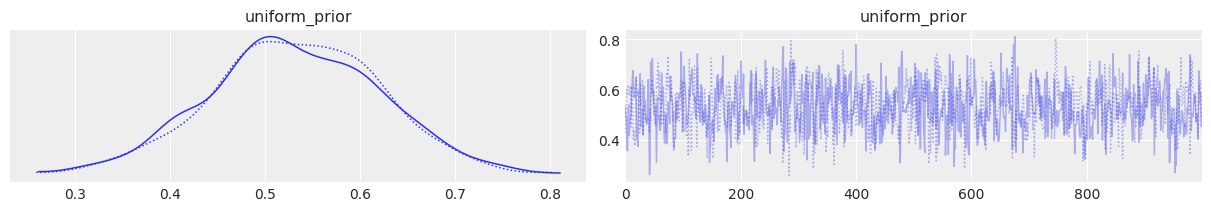

In [ ]:
az.plot_trace(trace_wolves)

And if it helps to structure the `wolf_ratio` model we just built as variables in Bayes’ Theorem, we can do so:

$Pr(H \mid E) = \frac{P(E \mid H) \cdot P(H)}{ \int Pr(E \mid H) \cdot Pr(H) \cdot dp}$

$Pr(p \mid M, N) =  \frac{Binom(M \mid p, N) \cdot Uni(p \mid 0, 1)}{\int Binom(M, F \mid p) \cdot Uni(p \mid 0, 1) \cdot dp} $

Again, it's important to emphasize that the goal here is to generate a posterior distribution of plausibilities for each prior value in its distribution. WE ARE NOT trying to find the gender ratio with the highest probability. That being said, if you were interested in what that value would be, we can use either PyMC’s `find_map` function to give us the most plausible prior value (i.e. the most plausible ratio of males to females), in the posterior distribution:

In [ ]:
pm.find_MAP(model=wolf_ratio)

{'uniform_prior_interval__': array(0.14310084),
 'uniform_prior': array(0.53571429)}

Or the Arviz's `summary` function, which also gives us the **maximum a priori** (i.e. **MAP**) of the posterior distribution, in addition to the **highest density intervals** (sometimes also referred to as the **compatibility interval**) which are the two prior values containing 89% of the distribution.

In [ ]:
az.summary(trace_wolves, round_to=2, kind="stats", hdi_prob=0.89)

,mean,sd,hdi_5.5%,hdi_94.5%
uniform_prior,0.53,0.09,0.39,0.68


There you have it. We’ve just gone through a basic introduction to the language of statistical model notations used in most academic studies. We then integrated model notations into our first PyMC model where we simulated the plausibility of encountering a male Vancouver Island coastal wolf in the wild, given that we know nothing about their male-to-female gender ratio. Getting comfortable with model notation will form a solid base for building more complex Bayesian models using PyMC. We will be planning to release more blogs on this topic in the near future, starting with an article on Bayesian Linear Prediction so stay tuned!

Re-doing the code above using NumPy:

Text(0, 0.5, 'Density')

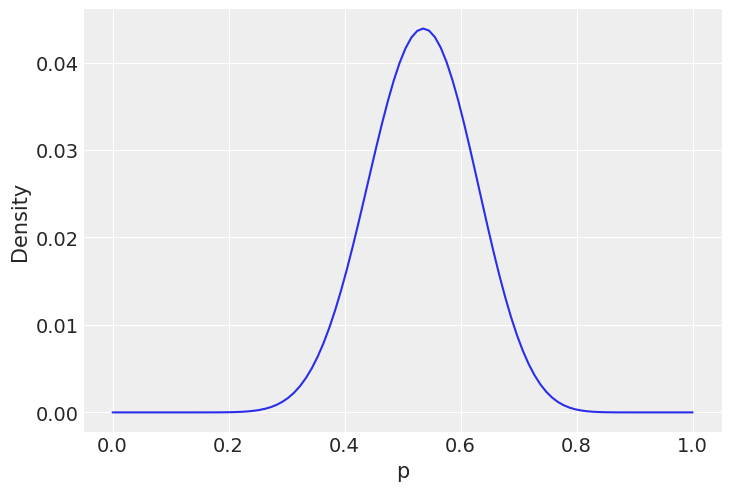

In [ ]:
priors = np.linspace(0, 1, 100)
posterior = stats.binom.pmf(k=males, n=total_samples, p=priors) * stats.uniform.pdf(priors, 0, 1)
posterior = posterior / (posterior).sum()
plt.plot(priors, posterior)
plt.xlabel("p")
plt.ylabel("Density")

In [ ]:
max(posterior)